<a href="https://colab.research.google.com/github/don-rukshan/Stock-Price-Prediction/blob/master/Machine_Learning_Stock_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# Description : This program uses an artificial recurrent neural netowrk called Long Short Term Memory (LSTM)
# to predict the closing stock price of a corporation (Apple Inc) using the past 100 day stock price.

In [0]:
# Import the libraries

import math
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
import pylab
plt.style.use('fivethirtyeight')

Using TensorFlow backend.


In [0]:
# Get the stock quote

df = web.DataReader('AAPL', data_source= 'yahoo', start='2012-01-01', end = '2019-12-17')
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,58.928570,58.428570,58.485714,58.747143,75555200.0,51.115936
2012-01-04,59.240002,58.468571,58.571430,59.062859,65005500.0,51.390648
2012-01-05,59.792858,58.952858,59.278572,59.718571,67817400.0,51.961189
2012-01-06,60.392857,59.888573,59.967144,60.342857,79573200.0,52.504375
2012-01-09,61.107143,60.192856,60.785713,60.247143,98506100.0,52.421093
...,...,...,...,...,...,...
2019-12-11,271.100006,268.500000,268.809998,270.769989,19689200.0,270.769989
2019-12-12,272.559998,267.320007,267.779999,271.459991,34327600.0,271.459991
2019-12-13,275.299988,270.929993,271.459991,275.149994,33396900.0,275.149994


In [0]:
# Get the number of rows and columns in the data set
df.shape

(2003, 6)

/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


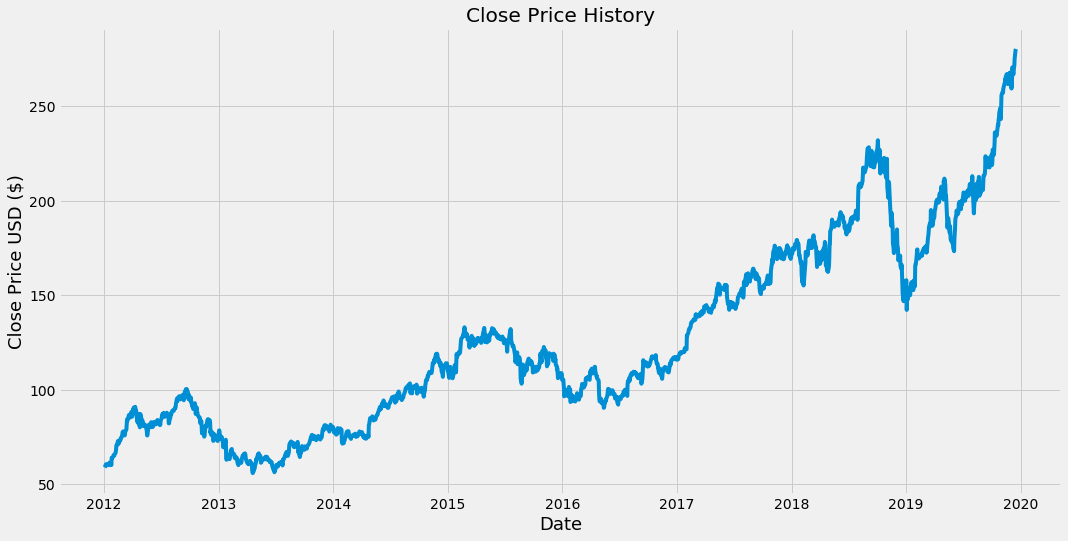

In [0]:
# Visualize the closing price history

plt.figure(figsize=(16,8))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

In [0]:
# Create a new dataframe with only the Close column
data = df.filter(['Close'])
# Convert the dateframe to a numpy array
dataset = data.values
#Get the number of rows to train the model on
training_data_len = math.ceil(len(dataset) * 0.8)

training_data_len

1603

In [0]:
#Scale the data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.01316509],
       [0.01457064],
       [0.01748985],
       ...,
       [0.97658263],
       [0.99755134],
       [1.        ]])

In [0]:
#Create the training data set
#Create the scaled training data set

train_data = scaled_data[0:training_data_len, :]
#split the data into x_train and y_train data set

x_train = []
y_train = []

for i in range(100, len(train_data)):
  x_train.append(train_data[i-100:i,0])
  y_train.append(train_data[i,0])
  if i<=101:
    print(x_train)
    print(y_train)
    print()

[array([0.01316509, 0.01457064, 0.01748985, 0.02026915, 0.01984303,
       0.02080338, 0.02036454, 0.01962679, 0.01862193, 0.02173194,
       0.02453668, 0.02367172, 0.01893356, 0.02345548, 0.01900352,
       0.03569838, 0.03440731, 0.0360927 , 0.03973694, 0.04194384,
       0.0417594 , 0.0410789 , 0.04397903, 0.04670744, 0.04979839,
       0.05479095, 0.0652785 , 0.06543749, 0.07127594, 0.07563885,
       0.06814046, 0.07102789, 0.07097066, 0.07906688, 0.07791571,
       0.08004628, 0.08387497, 0.08600558, 0.09214292, 0.09661397,
       0.09790501, 0.09835659, 0.09071194, 0.08886753, 0.08914103,
       0.09632775, 0.09835024, 0.10269405, 0.11293358, 0.12659476,
       0.12403805, 0.1240444 , 0.13392141, 0.13701233, 0.13481179,
       0.13280207, 0.13070964, 0.13766105, 0.14243103, 0.14442805,
       0.13949272, 0.13293563, 0.14507041, 0.15186917, 0.14868284,
       0.15464211, 0.1562639 , 0.15130952, 0.14988489, 0.14770341,
       0.13654806, 0.12058461, 0.13939096, 0.13852602, 0.1252

In [0]:
# convert the x_train and y_train to numpy arrays

x_train , y_train = np.array(x_train), np.array(y_train)

In [0]:
x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))
x_train.shape

(1503, 100, 1)

In [0]:
# build the LSTm model
model = Sequential()
model.add(LSTM(250, return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(LSTM(100, return_sequences=True))
model.add(LSTM(50, return_sequences= False))
model.add(Dense(25))
model.add(Dense(1))

In [0]:
#Compile the model

model.compile(optimizer='adam', loss='mean_squared_error')

In [0]:
# Train the model

_reg = model.fit(x_train, y_train, batch_size =32 , epochs = 50)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Epoch 1/50





1503/1503 [==============================] - 28s 19ms/step - loss: 0.0052
Epoch 2/50
1503/1503 [==============================] - 26s 17ms/step - loss: 4.2586e-04
Epoch 3/50
1503/1503 [==============================] - 26s 17ms/step - loss: 4.0216e-04
Epoch 4/50
1503/1503 [==============================] - 26s 17ms/step - loss: 3.5869e-04
Epoch 5/50
1503/1503 [==============================] - 26s 18ms/step - loss: 3.6306e-04
Epoch 6/50
1503/1503 [==============================] - 26s 17ms/step - loss: 3.3010e-04
Epoch 7/50
1503/1503 [==============================] - 26s 17ms/step - loss: 2.9741e-04
Epoch 8/50
1503/1503 [==============================] - 26s 17ms/step - loss: 2.8749e-04
Epoch 9/50
1503/1503 [==============================] - 27s 18ms/step - loss: 3.5647e-04
Epoch 10/50
1503/1503 [==============================] - 26s 17ms/step - loss: 3.3211e-04
Epoch 11/50

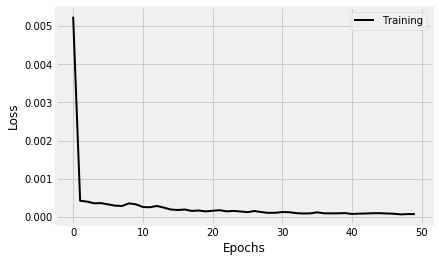

In [0]:
%matplotlib inline

def plot_history(network_history):
    plt.figure()
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.plot(network_history.history['loss'] , color='black', lw=2)
    plt.legend(['Training'])

plot_history(_reg)

In [0]:
#Create the testing data set
#Create a new array containing scaled values from index 1453 to 2003
test_data = scaled_data[training_data_len - 100 : , :]
# Create the data set x_test and y_test
x_test = []
y_test = dataset[training_data_len: , :]
for i in range(100, len(test_data)):
  x_test.append(test_data[i-100:i, 0])

In [0]:
#convert the data to a numy array
x_test = np.array(x_test)

In [0]:
# reshape the data
x_test = np.reshape(x_test,(x_test.shape[0], x_test.shape[1], 1))


In [0]:
# get the  odels predicted values
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

In [0]:
#Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean((predictions - y_test)**2))
rmse

5.596405296623455

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


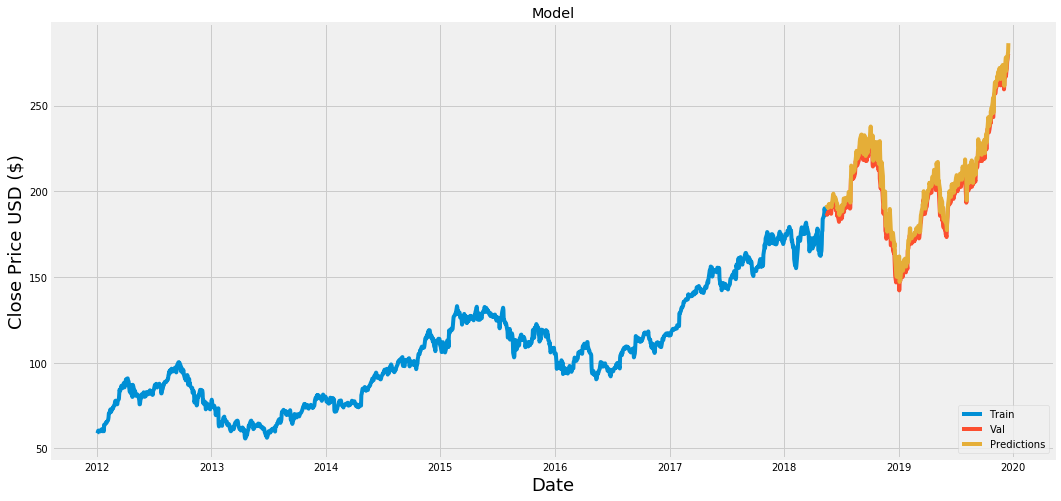

In [0]:
#plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
#visualize the data
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [0]:
# show the valid predicted prices
valid

,Close,Predictions
Date,,
2018-05-17,186.990005,192.050690
2018-05-18,186.309998,191.135193
2018-05-21,187.630005,190.223236
2018-05-22,187.160004,191.681076
2018-05-23,188.360001,191.353989
...,...,...
2019-12-11,270.769989,273.228729
2019-12-12,271.459991,275.998199
2019-12-13,275.149994,276.365997


In [0]:
# get the quote
apple_quote = web.DataReader('AAPL', data_source='yahoo', start='2012-01-01', end='2020-01-01')
# create a new data frame
new_df = apple_quote.filter(['Close'])
# get the last 100 day closing price values and convert the dataframe to an array
last_100_days = new_df[-100:].values
#scale the data to be values between 0
last_100_days_scaled = scaler.transform(last_100_days)
#Create an empty list
X_test = []
#append the past 100 days
X_test.append(last_100_days_scaled)
#Covert the X-test data set to a numpy array
X_test = np.array(X_test)
#Reshape the data
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1],1))
# Get the predicted scaled price
pred_price = model.predict(X_test)
# undo the scaling
pred_price = scaler.inverse_transform(pred_price)
print(pred_price)

[[298.0948]]


In [0]:
# get the quote
apple_quote2 = web.DataReader('AAPL', data_source='yahoo', start='2020-01-02', end='2020-01-02')
print(apple_quote2['Close'])

Date
2020-01-02    300.350006
Name: Close, dtype: float64
